dataset source = https://www.kaggle.com/datasets/advaypatil/youtube-statistics?select=comments.csv

In [33]:
#Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
comments = pd.read_csv(r'/Users/afni/Desktop/Portfolio projects/Youtube_analysis/dataset/comments.csv', error_bad_lines=False)

/var/folders/8c/dnxny4d56w12p9dsmrqmv1xc0000gn/T/ipykernel_3279/2033802442.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'/Users/afni/Desktop/Portfolio projects/Youtube_analysis/dataset/comments.csv', error_bad_lines=False)


In [4]:
#explore the data values so we know what we can do with this data
comments.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


By reviewing this data, I got three tasks that I have to do with this data:
1. I need to check the missing values and drop it and update the dataframe
2. I need to change the collumn 'Unnamed: 0' to 'Id'
3. change the 'Likes' and 'Sentiment' columns data type to integral so we can easily analyze in future use.

### 1. Check missing values, drop them, and update dataframe

In [5]:
#find out missing values in the data
comments.isna().sum()

Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64

In [6]:
# drop missing values and update dataframe as well
comments.dropna(inplace=True)

In [7]:
comments.isna().sum()

Unnamed: 0    0
Video ID      0
Comment       0
Likes         0
Sentiment     0
dtype: int64

### 2. Rename 'Unnamed: 0' Column

In [8]:
comments.rename(columns={'Unnamed: 0' : 'Id'}, inplace=True)

In [9]:
comments.head()

,Id,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


### Change columms data type

In [10]:
#change columns data type
comments['Likes'] = comments['Likes'].apply(np.int64)
comments['Sentiment'] = comments['Sentiment'].apply(np.int64)

In [11]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18408 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         18408 non-null  int64 
 1   Video ID   18408 non-null  object
 2   Comment    18408 non-null  object
 3   Likes      18408 non-null  int64 
 4   Sentiment  18408 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 862.9+ KB


In [12]:
comments.head()

,Id,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2


# Performing Sentiment Analysis

Sentiment analysis is all about analyzing sentiments of Users

### 1) Sentiment Analysis with TextBlob

In [13]:
!pip install textblob


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [14]:
from textblob import TextBlob

In [15]:
comments['Comment'][2]

"I will forever acknowledge this channel with the help of your lessons and ideas explanations, Now It's quite helpful while you'll just sit at your comfort and monitor your account Growth."

In [16]:
TextBlob(comments['Comment'][2]).sentiment.polarity

0.0

In [17]:
df1 = comments.copy()
df1.head()


,Id,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2


In [18]:
polarity_textblob = []
for comment in df1['Comment']:
    try:
        polarity_textblob.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity_textblob.append(0)

In [19]:
print(polarity_textblob[0:50])

[0.0756060606060606, 0.16, 0.0, -0.18333333333333335, 0.20833333333333334, 0.25555555555555554, -0.05, 0.0, 0.30476190476190473, 0.0, 0.18166666666666667, 0.26666666666666666, 0.44, 0.3666666666666667, -0.18, 0.47500000000000003, 0.3822727272727272, 0.5, 0.45625000000000004, 0.290625, 0.07857142857142856, 0.26325757575757575, 0.6, 0.65, 0.0, 0.6, 0.9, -0.02500000000000001, 0.3333333333333333, 0.375, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.13333333333333333, 0.375, 0.3041666666666667, 0.17222222222222225, 0.19866666666666666, 0.46875, 0.3291666666666667, 0.39999999999999997, 0.42500000000000004, 0.2819444444444444]


In [20]:
df1['polarity_textblob'] = polarity_textblob

In [21]:
df1.head()

,Id,Video ID,Comment,Likes,Sentiment,polarity_textblob
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1,0.075606
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,0.160000
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2,0.000000
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,-0.183333
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2,0.208333


In [22]:
comments.head()

,Id,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2


### 2) Sentiment Analysis with NLTK Vader

In [23]:
!pip install vaderSentiment


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sentiment = SentimentIntensityAnalyzer()

In [25]:
comments['Comment'][2]

"I will forever acknowledge this channel with the help of your lessons and ideas explanations, Now It's quite helpful while you'll just sit at your comfort and monitor your account Growth."

In [26]:
sentiment.polarity_scores(comments['Comment'][2])

{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'compound': 0.8718}

In [27]:
df2 = comments.copy()

In [29]:
#sentiment = SentimentIntensityAnalyzer()
#polarity_vader = []
#for comment in df2['Comment']:
    #try:
        #polarity_vader.append(sentiment.polarity_scores(comment))
    #except:
        #polarity_vader.append(0)

In [28]:
sentiment.polarity_scores(df2["Comment"][0]).get("pos")

0.146

In [30]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['Comment']
    myid = row['Id']
    res[myid] = sentiment.polarity_scores(text)

  0%|          | 0/18408 [00:00<?, ?it/s]

In [31]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df2, how='left')

In [32]:
vaders.head()

,Id,neg,neu,pos,compound,Video ID,Comment,Likes,Sentiment
0,0,0.023,0.831,0.146,0.6774,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,1,0.039,0.672,0.289,0.8360,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,2,0.000,0.713,0.287,0.8718,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,3,0.185,0.788,0.027,-0.8981,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,4,0.110,0.641,0.250,0.6786,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2


# Wordcloud Analysis

In [38]:
df1.head()

,Id,Video ID,Comment,Likes,Sentiment,polarity_textblob
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1,0.075606
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,0.160000
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2,0.000000
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,-0.183333
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2,0.208333


In [40]:
comments_positive = df1[df1['polarity_textblob']==1]
comments_negative = df1[df1['polarity_textblob']==-1]

In [42]:
comments_positive.head()

,Id,Video ID,Comment,Likes,Sentiment,polarity_textblob
71,71,2TqOmtTAMRY,The safety belt would've paired perfectly with...,6495,2,1.0
78,78,2TqOmtTAMRY,I haven't laughed like this for years! Oh my g...,5,2,1.0
79,79,2TqOmtTAMRY,Quality quality quality is everything about th...,2,2,1.0
119,119,pT_9hntWj34,We need the under $100 for August as well!! Th...,86,2,1.0
145,145,eFhhW6fsAbQ,Still the best series to watch while indulging...,21,2,1.0


In [43]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [59]:
from wordcloud import WordCloud, STOPWORDS

In [53]:
comments_negative['Comment']

76       The fact he didn't buy the Nicholas Cage spoon...
343      THANK YOU for addressing declawing cats, and h...
581      *This video is not for children, it's shocking...
739      All wars are terrible but honourable in defenc...
930      Multiplayer trophies tied to the platinum will...
1048                                        IT IS INSANE !
1853     The amount of effort this guy puts in his vide...
2598     If this doesn’t show how disgusting, spoiled, ...
3192     This guy advice terrible somedays age he told ...
3808                The time to kill of flatline is insane
3999                            this is insane!! respect!!
4231     The dedication that he had to not use one of t...
4240     This guy is insane I can’t even solve a 3x3 in...
4415     As a competitive cuber I can see how he does s...
4741     This playoff series and 2-game match format is...
5097     August is the WORST month for retail. They're ...
5330     Lannan: Is disgusted from photos\n\nAlso Lanna.

In [60]:
total_comments_negative = ' '.join(comments_negative['Comment'])
total_comments_positive = ' '.join(comments_positive['Comment'])

In [61]:
total_comments_negative[0:100]

"The fact he didn't buy the Nicholas Cage spoon is outrageous. THANK YOU for addressing declawing cat"

#### Negative Comments WordCloud

(-0.5, 399.5, 199.5, -0.5)

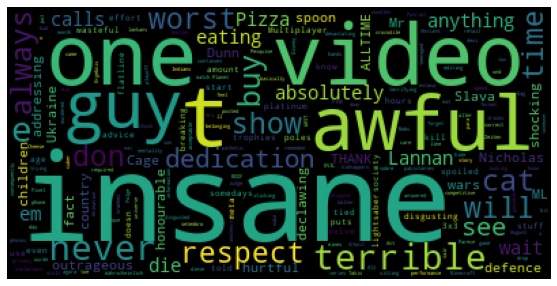

In [62]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### Positive Comments WordCloud

(-0.5, 399.5, 199.5, -0.5)

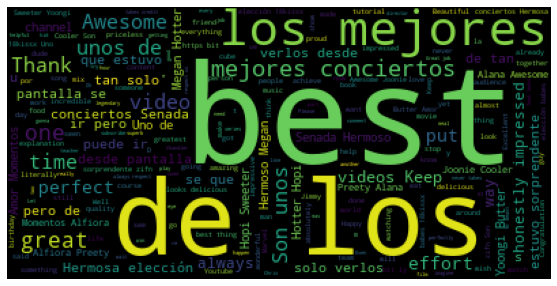

In [63]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Perform Emoji's Analysis

In [64]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=062fa623a6769220fcbaba299dbf5b7388d7fceb783ae6803c3aba1bdc8d5770
  Stored in directory: /Users/afni/Library/Caches/pip/wheels/34/1c/15/553c4ad364178bab0c80f1fec134dec07ad6f1afbf15e360c1
Successfully built emoji

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [65]:
import emoji

In [66]:
df1.head()

,Id,Video ID,Comment,Likes,Sentiment,polarity_textblob
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1,0.075606
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0,0.160000
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2,0.000000
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0,-0.183333
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2,0.208333


In [67]:
print('\U0001F600')

😀


Note-->> Every emoji has a Unicode associated with it
 '\U0001F600' is a unicode for 😀

 Unicode-->>The Unicode Standard provides a unique number for every characte ,ie 
           Unicode is a universal character encoding standard that assigns a code to every character and symbol in every language

In [71]:
emoji_list=[]
for comment in df1['Comment']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [72]:
emoji_list[0:10]

['😅', '🎉', '🎉', '🔥', '🔥', '🔥', '😂', '❤', '🤗', '😎']

In [73]:
# I need to compute frequencies of each emojis

from collections import Counter

In [75]:
Counter(emoji_list).most_common(10)

[('❤', 974),
 ('😂', 655),
 ('🔥', 501),
 ('👍', 353),
 ('🤣', 345),
 ('😍', 281),
 ('🙏', 249),
 ('👏', 226),
 ('😭', 199),
 ('🥰', 194)]

In [76]:
Counter(emoji_list).most_common(10)[0][0]

'❤'

In [77]:
emojis=[Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [78]:
emojis

['❤', '😂', '🔥', '👍', '🤣', '😍', '🙏', '👏', '😭', '🥰']

In [79]:
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [80]:
freqs

[974, 655, 501, 353, 345, 281, 249, 226, 199, 194]

In [81]:
!pip install plotly


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [83]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [84]:
trace = go.Bar(x=emojis, y=freqs)
iplot([trace])